In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gym
import gridworld
import numpy as np
import matplotlib.pyplot as plt
from random import sample 

## Q-Learning et test Q

In [3]:
env = gym.make('gridworld-v0')

In [4]:
""""map"""
k = 5

In [5]:
class Q_Agent(object):
    
    def __init__(self,action_space,environment, alpha = 0.1, gamma = 0.999):
        
        self.env = environment
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.Q = dict() 
        #"""Q""""
        
        for i in range(env.reset().shape[0]):
            for j in range(env.reset().shape[1]):
                self.Q[(i,j)] = {'0':0, '1':0, '2':0, '3':0}
                
        
    def choose_action(self, observation, reward, done):
        i, j = (np.where(observation == 2))
        current_qval = self.Q[(int(i),int(j))]
        maxValue = max(current_qval.values())
        action = np.random.choice([k for k, v in current_qval.items() if v == maxValue])
        """random choice for equality case, maximizing exploration"""
        return action
    
    
    def qlearn_and_act(self, observation, reward, done):
        act = self.choose_action(observation,reward,done)
        old_i, old_j = (np.where(observation == 2))
        old_qval = self.Q[(int(old_i),int(old_j))][act]
        obs,reward,done,info = env.step(act)
        i, j = (np.where(obs == 2))
        new_qval = self.Q[(int(i),int(j))]
        max_new_value = max(new_qval.values())
        
        self.Q[(int(old_i),int(old_j))][act] = (1-self.alpha) * old_qval + \
        self.alpha * (reward + self.gamma * max_new_value )
        
    
        return(obs,reward,done,info)
        
        
    

        
    

In [6]:
L_qlearn = []
for k in range(9):
    
    if __name__ == '__main__':


        env = gym.make("gridworld-v0")
        env.setPlan(f"gridworldPlans/plan{k}.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})

        env.seed(0)  # Initialise le seed du pseudo-random

        # Execution avec un Agent
        agent = Q_Agent(env.action_space,env) 


        episode_count = 1000
        reward = 0
        done = False
        rsum = 0
        FPS = 0.0001

        reward_qlearn = []
        for i in range(episode_count):
            obs = env.reset()
            env.verbose = (i % 100 == 0 and i > 0)  # afficher 1 episode sur 100
            if env.verbose:
                #env.render(FPS)
                pass
            j = 0
            rsum = 0
            while True:

                obs, reward, done, _ = agent.qlearn_and_act(obs, reward, done)

                rsum += reward
                j += 1
                if env.verbose:
                    pass
                    #env.render(FPS)
                if done:
                    reward_qlearn.append(rsum)
                    #print("Episode : " + str(i) + " rsum=" + str(rsum) + ", " + str(j) + " actions")
                    break
            
        L_qlearn.append(reward_qlearn)
        print("done")
        env.close()

done
done
done
done
done
done
done
done
done


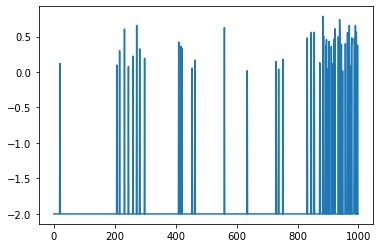

In [7]:
plt.plot(reward_qlearn)

 Petit bilan : L'algorithme converge pour les niveaux 1,2,3 et presque 4

## Implementation SARSA

In [8]:
class Q_Agent_Sarsa(object):
    
    def __init__(self,action_space,environment,epsilon = 0.05, alpha = 0.1, gamma = 0.999):
        
        self.env = environment
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = 0.05
        self.eps_decay = 0.999
        self.alpha_decay= 0.999
        self.Q = dict() #Dictionnaire pour les Qvalues
        
        for i in range(env.reset().shape[0]):
            for j in range(env.reset().shape[1]):
                self.Q[(i,j)] = {'0':0, '1':0, '2':0, '3':0}
                
        
    def choose_action(self, observation, reward, done):
        """Eps proba to discover"""
        if np.random.uniform(0, 1) < self.epsilon:
            return (str(np.random.randint(4)))
            
        else:
            i, j = (np.where(observation == 2))
            current_qval = self.Q[(int(i),int(j))]
            maxValue = max(current_qval.values())
            action = np.random.choice([k for k, v in current_qval.items() if v == maxValue])
  
            return action
    
    
    def qlearn_and_act(self, observation, reward, done):
        act = self.choose_action(observation,reward,done)
        old_i, old_j = (np.where(observation == 2))
        old_qval = self.Q[(int(old_i),int(old_j))][act]
        
        obs,reward,done,info = env.step(act)
        i, j = (np.where(obs == 2))
        new_qval = self.Q[(int(i),int(j))]
        max_new_value = max(new_qval.values())
        
        self.Q[(int(old_i),int(old_j))][act] = (1-self.alpha) * old_qval + \
        self.alpha * (reward + self.gamma * max_new_value )
        self.epsilon *= self.eps_decay
        self.alpha *= self.alpha_decay
        
        return(obs,reward,done,info)
  

In [9]:
L_sarsalearn = []
for k in range(9):
    if __name__ == '__main__':


        env = gym.make("gridworld-v0")
        env.setPlan(f"gridworldPlans/plan{k}.txt", {0: -0.001, 3: 1, 4: 1, 5: -1, 6: -1})

        env.seed(0)  # Initialise le seed du pseudo-random

        # Execution avec un Agent
        agent = Q_Agent_Sarsa(env.action_space,env) 


        episode_count = 1000
        reward = 0
        done = False
        rsum = 0
        FPS = 0.0001

        reward_qsarsalearn = []
        for i in range(episode_count):
            obs = env.reset()
            rsum = 0
            while True:

                obs, reward, done, _ = agent.qlearn_and_act(obs, reward, done)

                rsum += reward
                if done:
                    reward_qsarsalearn.append(rsum)
                    break
        L_sarsalearn.append(reward_qsarsalearn)
        print("done")
        env.close()



done
done
done
done
done
done
done
done
done


In [10]:
qlearn_mean = [k.mean() for k in np.array(L_qlearn)]
sarsalearn_mean = [k.mean() for k in np.array(L_sarsalearn)]
qlearn_var = [k.var() for k in np.array(L_qlearn)]
sarsalearn_var = [k.var() for k in np.array(L_sarsalearn)]

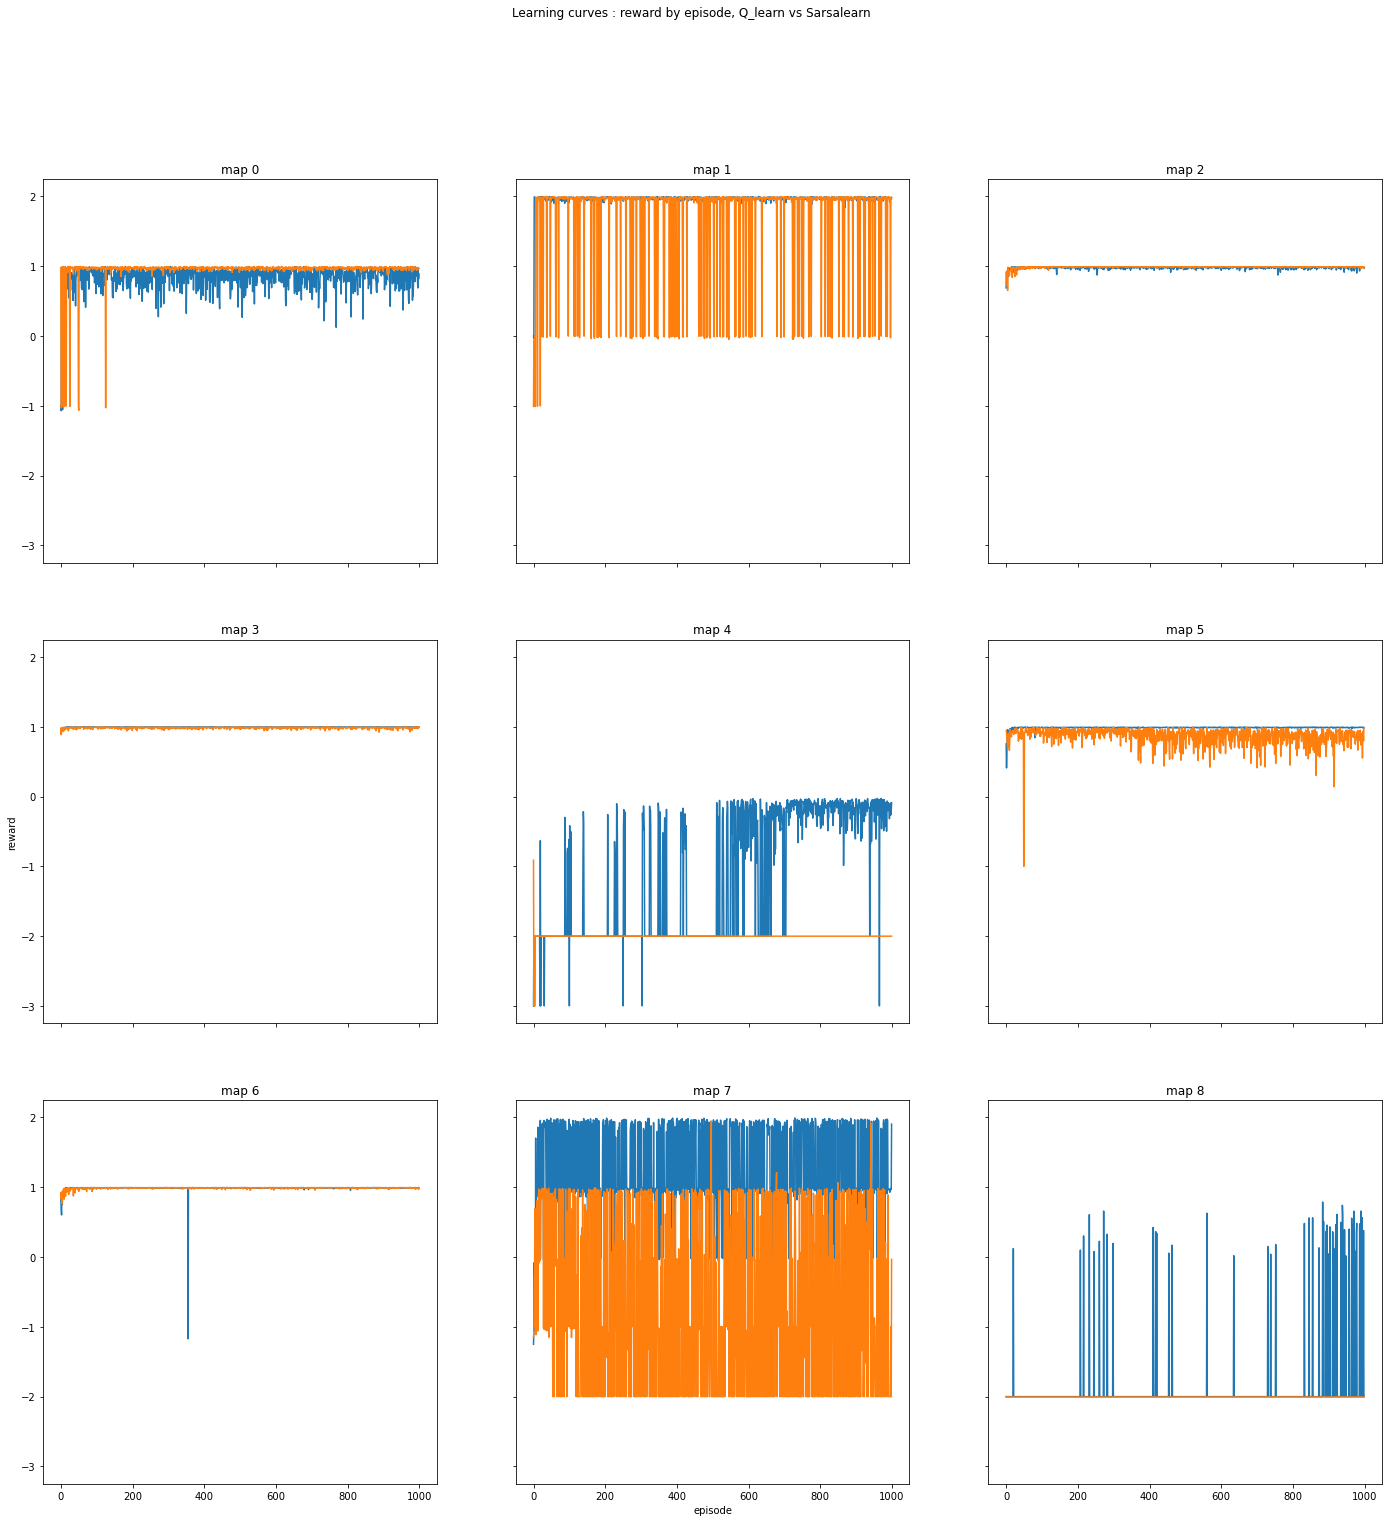

In [11]:
fig, ax = plt.subplots(3,3,sharey = True,sharex = True,figsize = (24,24))
fig.suptitle('Learning curves : reward by episode, Q_learn vs Sarsalearn')

ax[0,0].plot(L_qlearn[0], label="reward_qlearn")
ax[0,0].plot(L_sarsalearn[0], label="reward_sarsalearn")
ax[0,0].set_title('map 0')


ax[0,1].plot(L_qlearn[1], label="reward_qlearn")
ax[0,1].plot(L_sarsalearn[1], label="reward_sarsalearn")
ax[0,1].set_title('map 1')

ax[0,2].plot(L_qlearn[2], label="reward_qlearn")
ax[0,2].plot(L_sarsalearn[2], label="reward_sarsalearn")
ax[0,2].set_title('map 2')

ax[1,0].plot(L_qlearn[3], label="reward_qlearn")
ax[1,0].plot(L_sarsalearn[3], label="reward_sarsalearn")
ax[1,0].set_ylabel('reward')
ax[1,0].set_title('map 3')

ax[1,1].plot(L_qlearn[4], label="reward_qlearn")
ax[1,1].plot(L_sarsalearn[4], label="reward_sarsalearn")
ax[1,1].set_title('map 4')

ax[1,2].plot(L_qlearn[5], label="reward_qlearn")
ax[1,2].plot(L_sarsalearn[5], label="reward_sarsalearn")
ax[1,2].set_title('map 5')

ax[2,0].plot(L_qlearn[6], label="reward_qlearn")
ax[2,0].plot(L_sarsalearn[6], label="reward_sarsalearn")
ax[2,0].set_title('map 6')

ax[2,1].plot(L_qlearn[7], label="reward_qlearn")
ax[2,1].plot(L_sarsalearn[7], label="reward_sarsalearn")
ax[2,1].set_xlabel('episode')
ax[2,1].set_title('map 7')

ax[2,2].plot(L_qlearn[8], label="reward_qlearn")
ax[2,2].plot(L_sarsalearn[8], label="reward_sarsalearn")
ax[2,2].set_title('map 8')

#ax[1].plot(reward_qsarsalearn,color='green', label="reward_qsarsalearn")
#ax[2].plot(reward_dqlearn,color='blue', label="reward_dq_learn")
#ax[0].set_title('q_learn')
#ax[1].set_title('Sarsa_learn')
#ax[2].set_title('dyna_q_learn')
#ax[1].set_xlabel('episode')
#ax[0].set_ylabel('reward')
fig.savefig(f'Agents_on_all_map.png', dpi=fig.dpi);

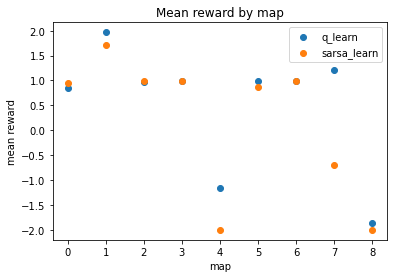

In [12]:
fig, ax = plt.subplots()
ax.scatter([0,1,2,3,4,5,6,7,8],qlearn_mean, label="q_learn")
ax.scatter([0,1,2,3,4,5,6,7,8],sarsalearn_mean, label="sarsa_learn")

ax.set_title('Mean reward by map')
ax.set_xlabel('map')
ax.set_ylabel('mean reward')
ax.legend(loc="best")
fig.savefig(f'reward_mean_diff.png');

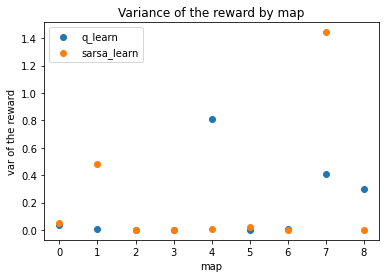

In [13]:
fig, ax = plt.subplots()
ax.scatter([0,1,2,3,4,5,6,7,8],qlearn_var, label="q_learn")
ax.scatter([0,1,2,3,4,5,6,7,8],sarsalearn_var, label="sarsa_learn")

ax.set_title('Variance of the reward by map')
ax.set_xlabel('map')
ax.set_ylabel('var of the reward')
ax.legend(loc="best")
fig.savefig(f'reward_var_diff.png');